<b>Universidad Tecnológica Nacional, Buenos Aires

Ingeniería Industrial

Cátedra de Ciencia de Datos - Curso I5521 - Turno sabado mañana

Elaborado por: Agustin Velazquez<b>


# Red Wine Quality

El objetivo es poder determinar la calidad de un vino tinto en base a los resultados de un test quimico sobre el vino. Leer el README que acompaña el dataset para obtener una mayor vision del problema

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [4]:
#Cargamos el dataset y vemos los datos. 
#Es necesario conocer que significa cada columna para que tenga sentido las decisiones que tomamos. 
#La informacion del dataset se incluye en el readme
wine = pd.read_csv(r'C:\Users\avelazquez\Documents\ClusterAI\Red Wine Quality Task\winequality-red.csv')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


#### Vamos a graficar la relacion entre alguna de las variables y la calidad para ver si observamos alguna relacion marcada

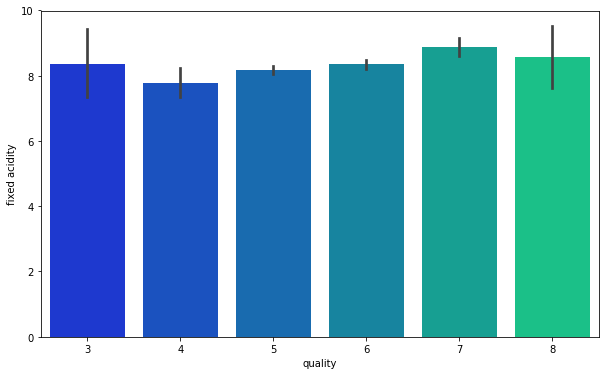

In [27]:
#Aparentemente la acidez no nos da una relacion directa con la calidad
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine, palette="winter")

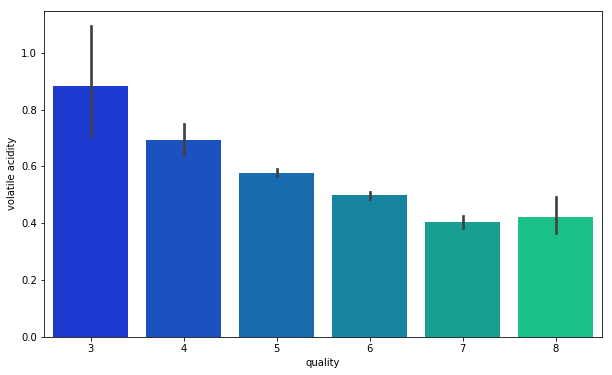

In [26]:
#En los vino de menor calidad hay mayor volatilidad acida
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine, palette="winter")

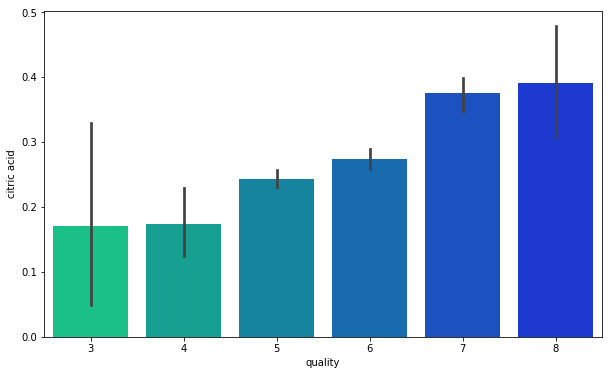

In [20]:
#La composicion del acido citrico es mayor en los vinos de mayor calidad
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine,  palette="winter_r")

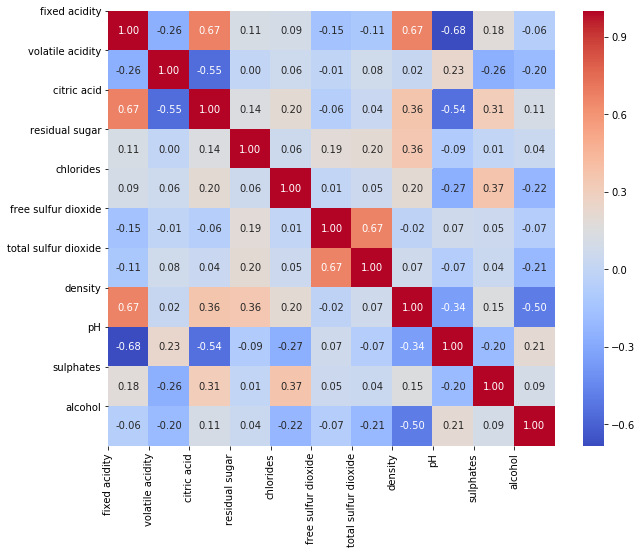

In [48]:
#Realizamos una matriz de correlacion para evaluar si existe alguna relacion lineal entre las variables
corr = wine.corr()
#Plot
fig, ax = plt.subplots(figsize=(10, 8))
#Permitimos anotaciones y numeros (float) sobre el mapa
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [42]:
#Vamos a hacer una clasificacion binaria de la calidad dividiendolo en bueno y malo
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [31]:
#Ahora utilizamos el encoder de sklearn
label_quality = LabelEncoder() #from sklearn.preprocessing, sirve para transformar los valores entre 0 y n_clases-1
#Bad es 0 y good es 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

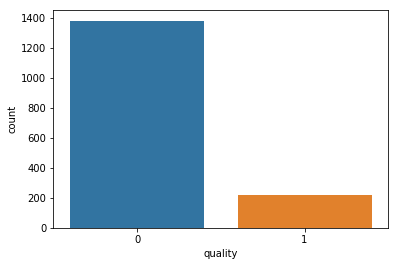

In [32]:
sns.countplot(wine['quality'])

In [33]:
#Separamos el dataset en features y objetivo
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [34]:
#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
#Aplicamos standard scaler para optimizar los resultados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
#Entrenamos (sin crossvalidar) un modelo de Support Vector
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [38]:
#Buscamos mejores parametros usando CV
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
#Obtenemos los mejores parametros
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [40]:
#Corremos de nuevo SVC con los mejores parametros encontrados
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

   micro avg       0.90      0.90      0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



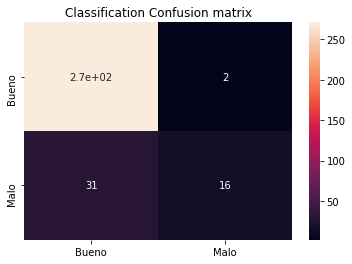

In [47]:
#Graficos unas matris de confusion
cm =confusion_matrix(y_test, pred_svc2)
confmat = pd.DataFrame(cm, index = ['Bueno', 'Malo'], columns = ['Bueno', 'Malo'])
plt.figure(figsize = (6,4))
sns.heatmap(confmat, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

## Asignación 01: Obtener el  Area Under the ROC Curve (AUC ROC)

## Asignación 02: Clasificar el dataset utilizando el modelo Random Forest (sklearn) 

## Asignación 03: Clasificar el dataset utilizando Naive Bayes

## Asignación 04: Poner en una tabla el accuracy, AUC ROC y confunsion matrix para cada modelo y decidir cual fue el mejor algoritmo